In [7]:
#utilities
import re

In [8]:
import numpy as np

In [9]:
import pandas as pd

#plotting
import seaborn as sns

In [11]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from wordcloud import WordCloud

In [13]:
import matplotlib.pyplot as plt

In [14]:
#nltk
from nltk.stem import WordNetLemmatizer


In [15]:
#sklearn
from sklearn.svm import LinearSVC

In [16]:
from sklearn.naive_bayes import BernoulliNB

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING= "ISO-8859-1"
df = pd.read_csv('Training-Data.csv',encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
549584,0,2202684576,Tue Jun 16 22:13:41 PDT 2009,NO_QUERY,MarkRytchRemedy,@keemadiva i'm sorry to hear about ur grammy ...
49922,0,1678311795,Sat May 02 06:17:16 PDT 2009,NO_QUERY,thebadhousewife,@mabeswife I feel like I haven't seen you in d...
131941,0,1835641944,Mon May 18 06:26:41 PDT 2009,NO_QUERY,LLLai,'s whole family is in Malacca...man I wanna be...
1447741,4,2062656960,Sat Jun 06 23:53:25 PDT 2009,NO_QUERY,kate1689,@mileycyrus holaaaaa hiii please come to peru ...
191849,0,1969727445,Sat May 30 01:00:37 PDT 2009,NO_QUERY,choutea,Do I really wanna leave? It becomes a big ques...


In [22]:
#Exploring Data
#Top five records
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [23]:
#Columns/features in data
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [24]:
#Length of Dataset
print('length of data is', len(df))

length of data is 1600000


In [25]:
#Shape of data
df.shape

(1600000, 6)

In [26]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [27]:
#Checking for null values
np.sum(df.isnull().any(axis=1))

0

In [28]:
#Rows and columns in the dataset
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [29]:
#Checking unique target values
df['target'].unique()

array([0, 4], dtype=int64)

In [30]:
df['target'].nunique()

2

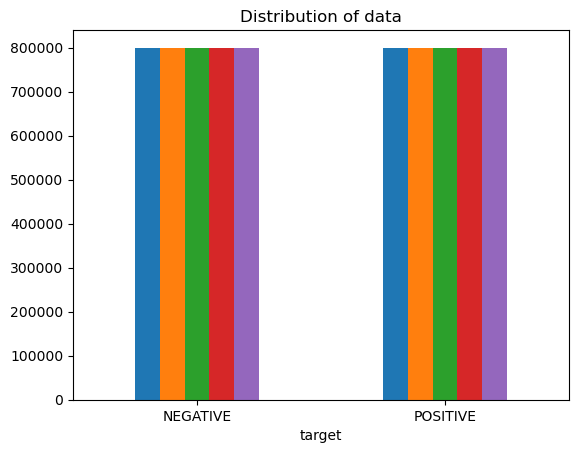

In [31]:
#Plotting the distribution for dataset
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['NEGATIVE','POSITIVE'],rotation=0)
#Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

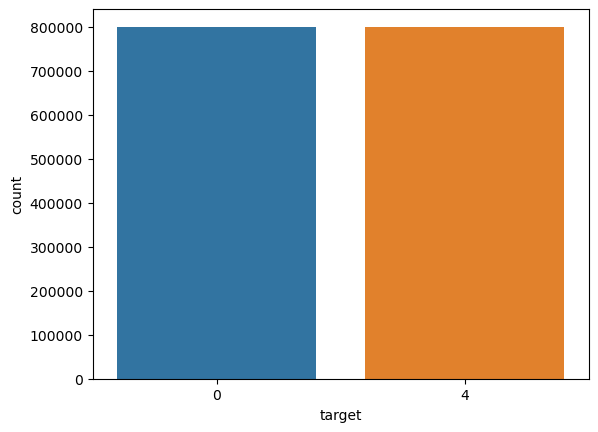

In [32]:
import seaborn as sns
sns.countplot(x='target',data=df)

In [33]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [34]:
#Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
data['target'] = data['target'].replace(4,1)

C:\Users\User\AppData\Local\Temp\ipykernel_8664\1310700627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [35]:
#Printing unique values of target variables
data['target'].unique()

array([0, 1], dtype=int64)

In [36]:
#Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [37]:
#Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(400000)]
data_neg = data_neg.iloc[:int(400000)]

In [38]:
#Combining positive and negative tweets
dataset = pd.concat([data_pos,data_neg])

In [39]:
#Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

399995           @omjchristinaaa awwwwe  i wish i was there
399996    @jonasbrothers your youtube channel has been s...
399997                         @rray88 i don't get it  haha
399998    wishing i was at ooc right now  didn't get to ...
399999                     @krose82 oh... i miss the chick 
Name: text, dtype: object

In [40]:
#Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [41]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [42]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

399995                       omjchristinaaa awwwwe wish
399996    jonasbrothers youtube channel suspended weird
399997                             rray88 dont get haha
399998                  wishing ooc right didnt get see
399999                            krose82 oh miss chick
Name: text, dtype: object

In [43]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

399995                       omjchristinaaa awwwwe wish
399996    jonasbrothers youtube channel suspended weird
399997                             rray88 dont get haha
399998                  wishing ooc right didnt get see
399999                            krose82 oh miss chick
Name: text, dtype: object

In [44]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

399995                              omjchristinaaa a sh
399996    jonasbrothers youtube channel suspended weird
399997                             rray88 dont get haha
399998                  wishing ooc right didnt get see
399999                            krose82 oh miss chick
Name: text, dtype: object

In [45]:
#Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

399995                              omjchristinaaa a sh
399996    jonasbrothers youtube channel suspended weird
399997                               rray dont get haha
399998                  wishing ooc right didnt get see
399999                              krose oh miss chick
Name: text, dtype: object

In [46]:
#from nltk.tokenize import RegexpTokenizer

In [47]:
#tokenizer = RegexpTokenizer(r'w+')

In [48]:
#dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [49]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [50]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [51]:
#Applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [52]:
#Separating input feature and label
X=data.text
y=data.target

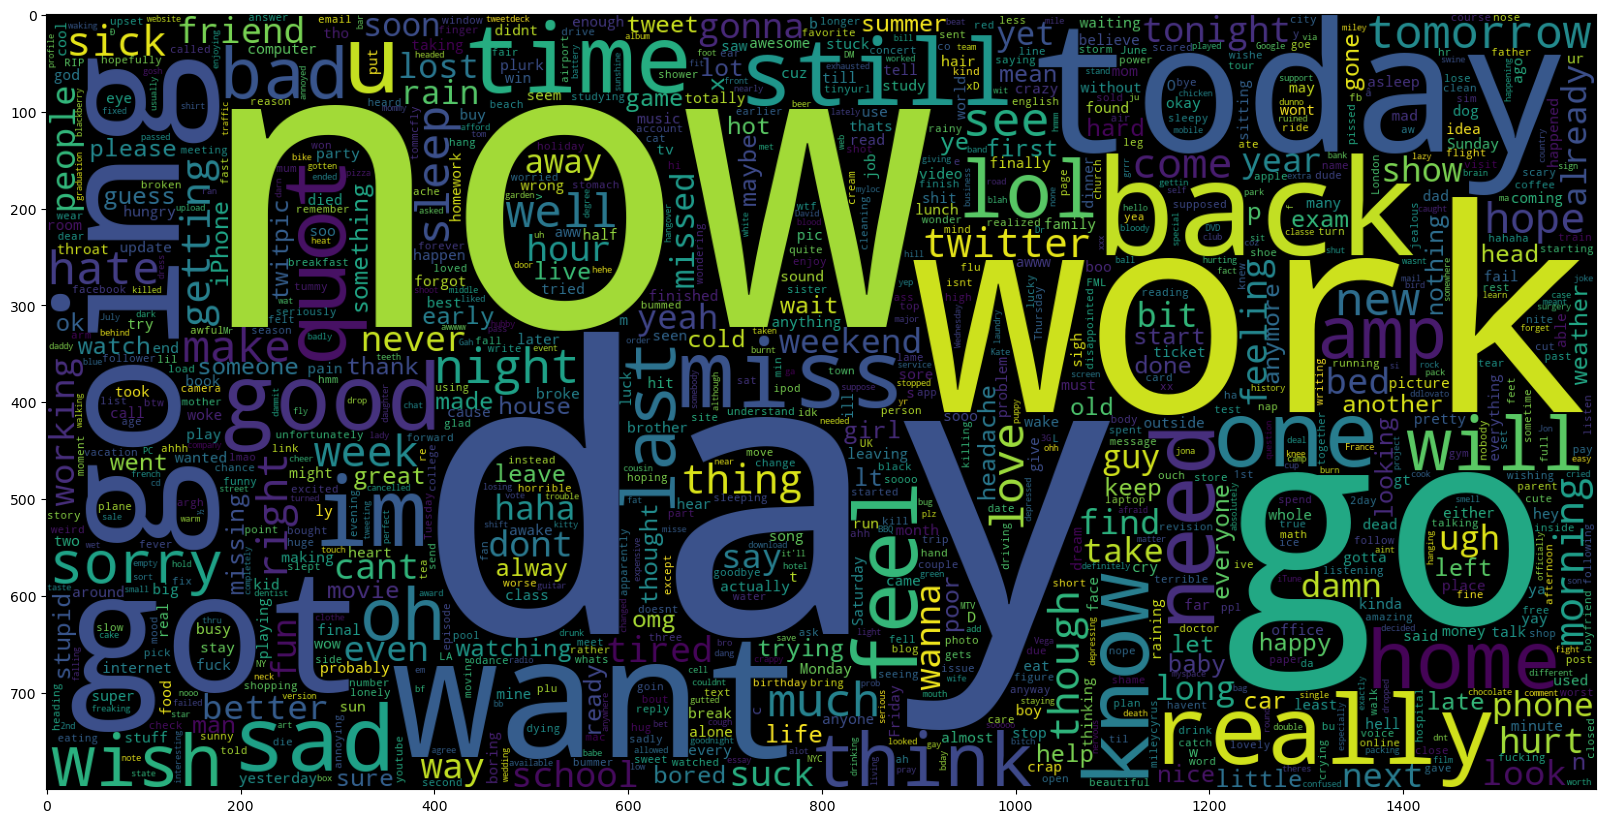

In [53]:
#Plot a cloud of words for negative tweets
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

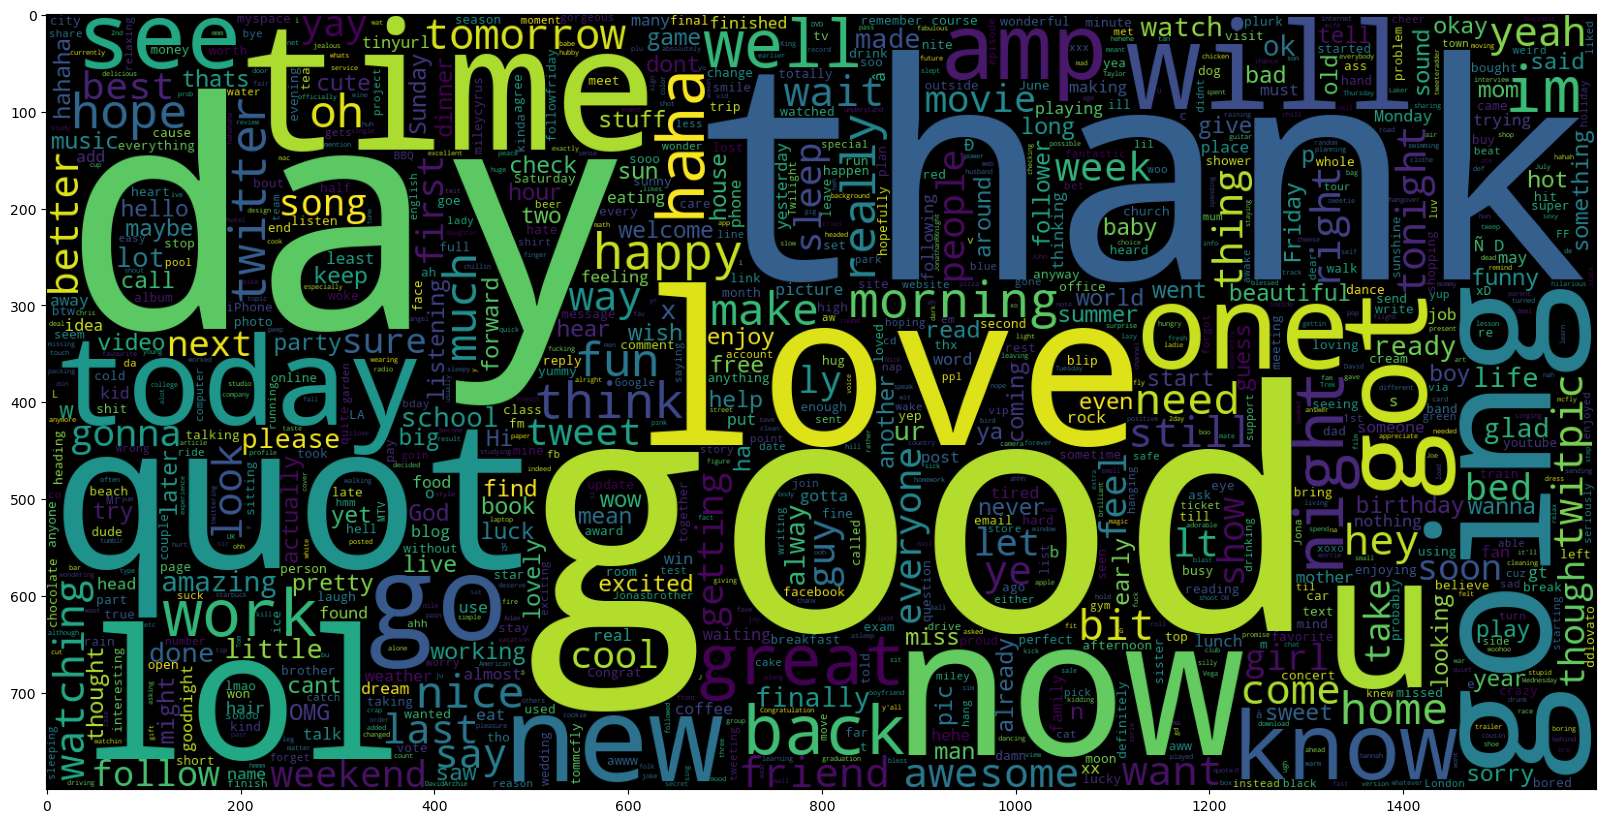

In [54]:
#Plot a cloud of words for positive tweets
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [55]:
#Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [56]:
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [58]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    cf_matrix = confusion_matrix(y_test,y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



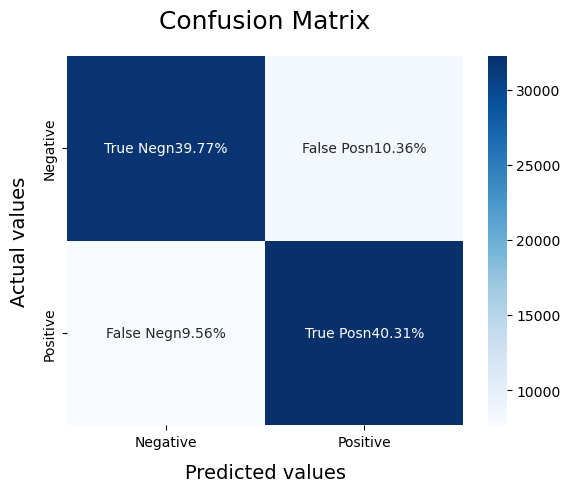

In [59]:
#Model Building
#Model-1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

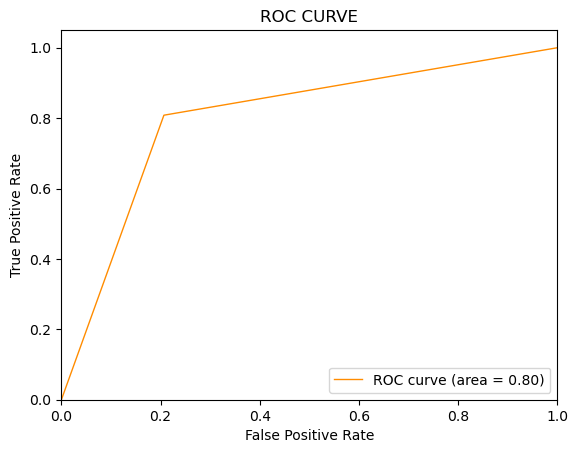

In [60]:
#Ploting the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



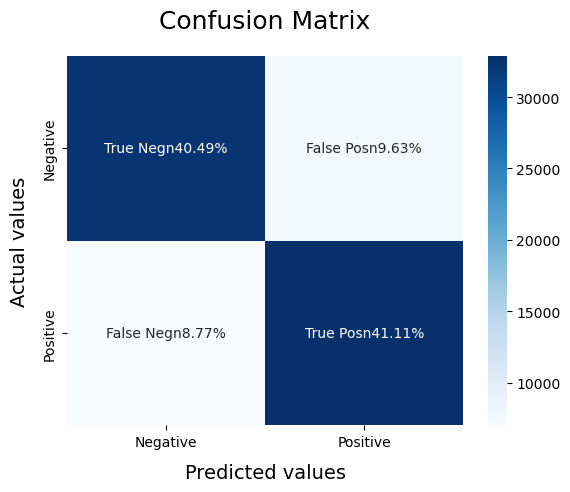

In [61]:
#Model-2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

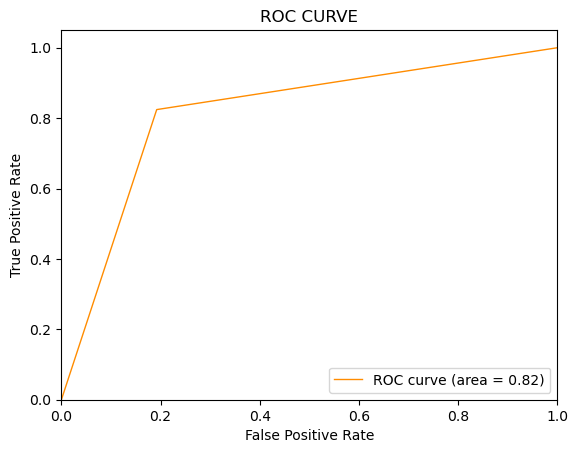

In [62]:
#Plot the ROC-AUC Curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



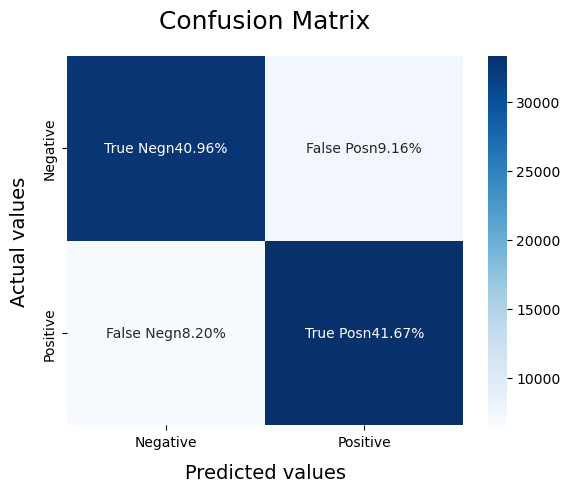

In [63]:
#Model-3
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

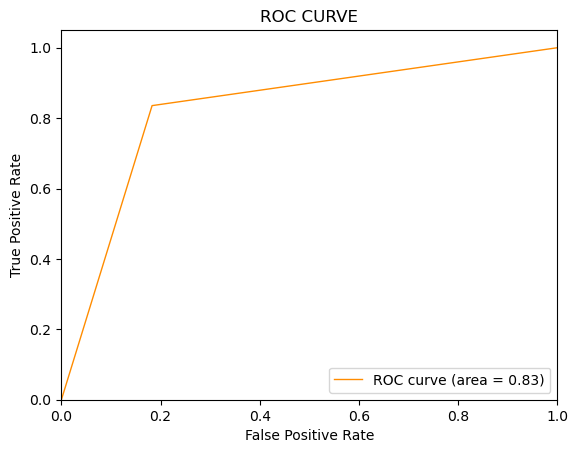

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()